## Explorative Datenanalyse

### EDA Preprocessing

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('mako')

In [63]:
data = pd.read_csv('dataset.csv')

In [64]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [65]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [67]:
data.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

Die lokale Währung der jeweiligen Wohnsitze der Mitarbeiter interessiert mich eher weniger. Daher behalte ich zum einfacheren Vergleich nur die Spalte 'salary_in_usd'.

In [68]:
data.drop(['salary', 'salary_currency'], axis= 1, inplace= True)

Die Job-Bezeichnungen sind zu viele und somit zu unübersichtlich. Um es in den Visualisierungen übersichtlicher zu gestalten, werde ich mir die Jobs in übergeordnete Kategorien einteilen. Somit haben wir nur noch 6 Labels an der Plot-Achse anstatt 30. Wir können dennoch immer noch einzelne Job-Bezeichnungen aufrufen indem wir data['job_title'] verwenden anstatt data['job_category'].

In [69]:
def job_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer",
                        "BI Data Analyst", "Business Data Analyst", "BI Developer",
                        "BI Analyst", "Business Intelligence Engineer",
                        "BI Data Engineer", "Power BI Developer"]
    
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist",
                        "3D Computer Vision Researcher", "Deep Learning Researcher",
                        "AI/Computer Vision Engineer"]
    
    machine_learning = ["Machine Learning Engineer", "ML Engineer",
                        "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    
    management = ["Data Science Manager", "Director of Data Science",
                  "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning",
                  "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"
    
data['job_category'] = data['job_title'].apply(job_category)

Das selbe gilt auch für den Wohnsitz der Mitarbeiter und den Standort des Unternehmens.

Dafür schaue ich mir die Ländercodes an und definiere eine Funktion, die je nach Ländercode die jeweiligen Länder in Kontinente einordnet. 

In [70]:
def emp_residence(emp_res):

    north_america = ['US', 'CA', 'MX']

    central_america = ['HN', 'CR', 'PR', 'DO']

    south_america = ['EC', 'PE', 'CO', 'BO', 'BR', 'CL', 'AR']

    europe = ['AT', 'ES', 'FR', 'IT', 'MD', 
              'NL', 'EE', 'HU', 'NO', 'DK',
              'LT', 'LV', 'DE', 'FI', 'HR',
              'CH', 'GR', 'PL', 'UA', 'PT',
              'BA', 'IE', 'MT', 'RO',
              'CZ', 'SI', 'BE', 'AD', 'SE',
              'BG', 'RS', 'LU', 'GB', 'RU']
    
    middle_east = ['GE', 'IL', 'AE',
                   'SA', 'TR', 'OM', 'LB',
                   'PK', 'AM', 'QA', 'UZ',
                   'KW', 'CY', 'IR',
                   'IQ']
    
    asia = ['IN', 'PH', 'VN', 'TH',
            'KR', 'JP', 'SG', 'CN',
            'ID', 'MY']
    
    africa = ['ZA', 'KE', 'EG', 'NG', 'UG',
              'MU', 'TN', 'GH', 'CF',
              'DZ']
    
    oceania = ['AU', 'NZ', 'AS']

    if emp_res in north_america:
        return 'North America'
    elif emp_res in central_america:
        return 'Central America'
    elif emp_res in south_america:
        return 'South America'
    elif emp_res in europe:
        return 'Europe'
    elif emp_res in middle_east:
        return 'Middle East'
    elif emp_res in asia:
        return 'Asia'
    elif emp_res in africa:
        return 'Africa'
    elif emp_res in oceania:
        return 'Oceania'
    else:
        return 'Other'

In [71]:
def standort(standort):

    north_america = ['US', 'CA', 'MX']

    central_america = ['HN', 'CR', 'PR', 'DO']

    south_america = ['EC', 'PE', 'CO', 'BO', 'BR', 'CL', 'AR']

    europe = ['AT', 'ES', 'FR', 'IT', 'MD', 
              'NL', 'EE', 'HU', 'NO', 'DK',
              'LT', 'LV', 'DE', 'FI', 'HR',
              'CH', 'GR', 'PL', 'UA', 'PT',
              'BA', 'IE', 'MT', 'RO',
              'CZ', 'SI', 'BE', 'AD', 'SE',
              'BG', 'RS', 'LU', 'GB', 'RU']
    
    middle_east = ['GE', 'IL', 'AE',
                   'SA', 'TR', 'OM', 'LB',
                   'PK', 'AM', 'QA', 'UZ',
                   'KW', 'CY', 'IR',
                   'IQ']
    
    asia = ['IN', 'PH', 'VN', 'TH',
            'KR', 'JP', 'SG', 'CN',
            'ID', 'MY']
    
    africa = ['ZA', 'KE', 'EG', 'NG', 'UG',
              'MU', 'TN', 'GH', 'CF',
              'DZ']
    
    oceania = ['AU', 'NZ', 'AS']

    if standort in north_america:
        return 'North America'
    elif standort in central_america:
        return 'Central America'
    elif standort in south_america:
        return 'South America'
    elif standort in europe:
        return 'Europe'
    elif standort in middle_east:
        return 'Middle East'
    elif standort in asia:
        return 'Asia'
    elif standort in africa:
        return 'Africa'
    elif standort in oceania:
        return 'Oceania'
    else:
        return 'Other'

In [72]:
data['residence'] = data['employee_residence'].apply(emp_residence)

In [73]:
data['company_continent'] = data['company_location'].apply(standort)

In [74]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,residence,company_continent
0,2024,SE,FT,AI Engineer,202730,US,0,US,M,Other,North America,North America
1,2024,SE,FT,AI Engineer,92118,US,0,US,M,Other,North America,North America
2,2024,SE,FT,Data Engineer,130500,US,0,US,M,Data Engineering,North America,North America
3,2024,SE,FT,Data Engineer,96000,US,0,US,M,Data Engineering,North America,North America
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M,Machine Learning,North America,North America


Jetzt haben wir sowohl die Wohnsitze der Mitarbeiter wie auch den Standort des Unternehmens von Ländern auf Kontinente simplifiziert. Ist etwas ungenauer aber dafür übersichtlicher in Betracht auf Visualisierungen. Und die Möglichkeit nach den Ländern zu visualisieren besteht nach wie vor.

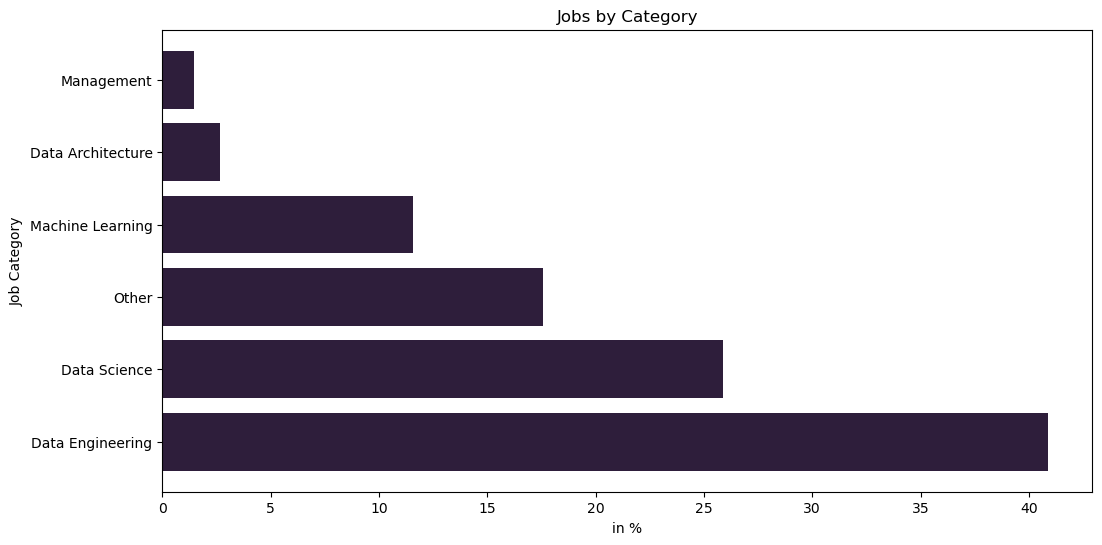

In [75]:
value_counts = data['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('in %')
ax.set_ylabel('Job Category')
ax.set_title('Jobs by Category')
plt.show()

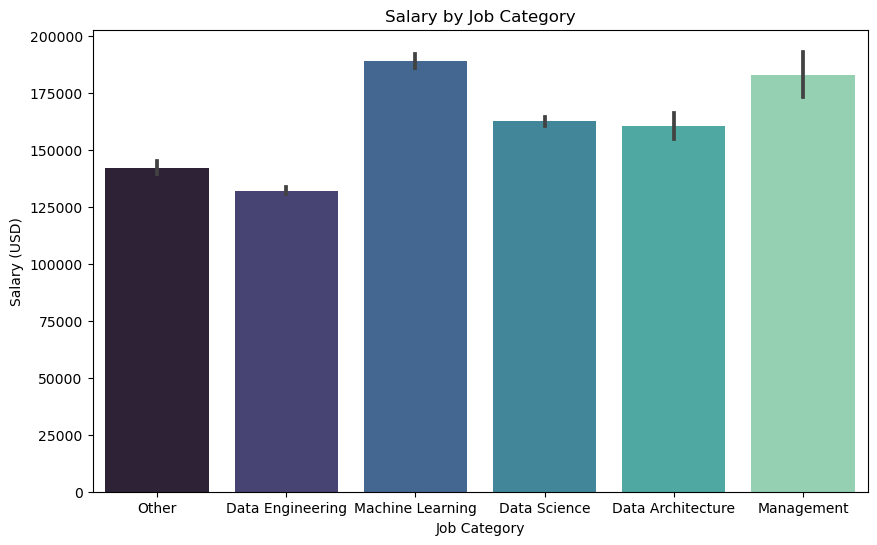

In [76]:
plt.figure(figsize= (10,6))
sns.barplot(data, x= 'job_category', y= 'salary_in_usd')
plt.title('Salary by Job Category')
plt.ylabel('Salary (USD)')
plt.xlabel('Job Category')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Company Location')

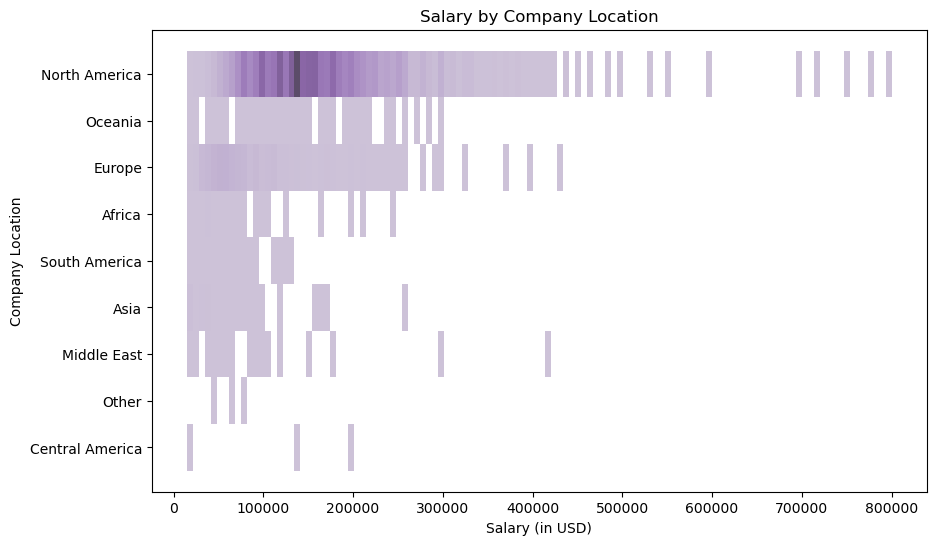

In [77]:
plt.figure(figsize= (10,6))
sns.histplot(data, x= 'salary_in_usd', y= 'company_continent')
plt.title('Salary by Company Location')
plt.xlabel('Salary (in USD)')
plt.ylabel('Company Location')

Text(0, 0.5, 'Salary (in USD)')

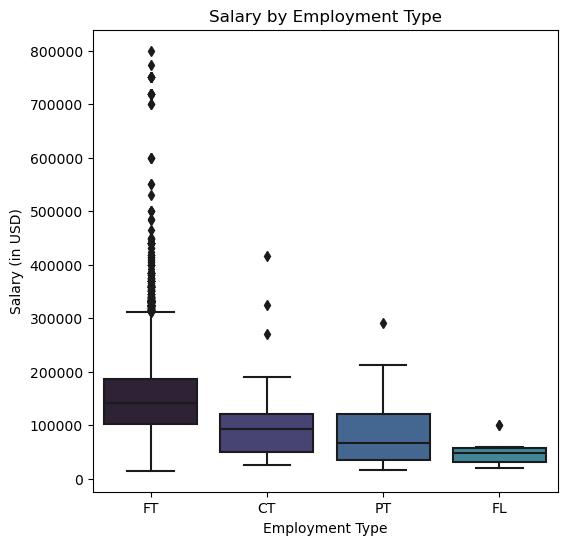

In [78]:
plt.figure(figsize= (6,6))
sns.boxplot(data, x= data['employment_type'], y= data['salary_in_usd'])
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')

In [79]:
avg_salary = data.groupby('work_year')['salary_in_usd'].mean()
avg_salary

work_year
2020    102250.866667
2021     99922.073394
2022    134349.500906
2023    153732.664632
2024    150564.095269
Name: salary_in_usd, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-21.680555555555557, 0.5, 'Salary (in USD)')

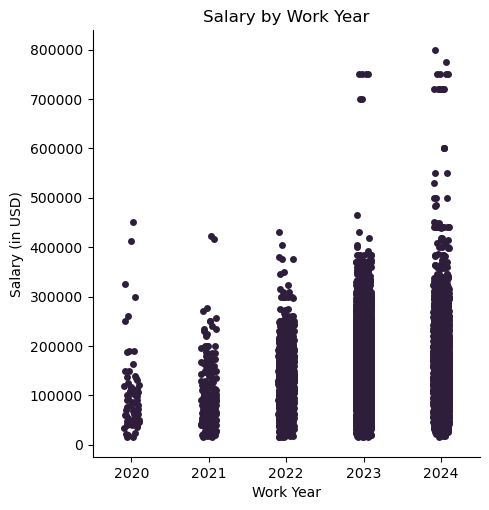

In [80]:
sns.catplot(data, x= data['work_year'], y= data['salary_in_usd'])
plt.title('Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')

## Prediktive Datenanalyse

### Preprocessing

In [81]:
cat_col = ['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'job_category', 'residence', 'company_continent']
num_col = ['work_year', 'salary_in_usd']

df_copy = data.copy()

df_copy.drop(['job_title', 'employee_residence', 'company_location'], axis= 1, inplace= True)

In [82]:
df_copy['experience_level'] = df_copy['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], [0,1,2,3])
df_copy['employment_type'] = df_copy['employment_type'].replace(['FT', 'PT', 'FL', 'CT'], [0,1,2,3])
df_copy['remote_ratio'] = df_copy['remote_ratio'].replace([0, 50, 100,], [0,1,2])
df_copy['company_size'] = df_copy['company_size'].replace(['S', 'M', 'L',], [0,1,2])
df_copy['remote_ratio'] = df_copy['remote_ratio'].replace([0, 50, 100,], [0,1,2])
df_copy['job_category'] = df_copy['job_category'].replace(['Data Engineering', 'Machine Learning', 'Data Science', 'Data Architecture', 'Management', 'Other'], [0,1,2,3,4,5])
df_copy['residence'] = df_copy['residence'].replace(['North America', 'Central America', 'South America', 'Europe', 'Africa', 'Middle East', 'Asia', 'Oceania','Other'], [0,1,2,3,4,5,6,7,8])
df_copy['company_continent'] = df_copy['company_continent'].replace(['North America', 'Central America', 'South America', 'Europe', 'Africa', 'Middle East', 'Asia', 'Oceania','Other'], [0,1,2,3,4,5,6,7,8])

<Axes: >

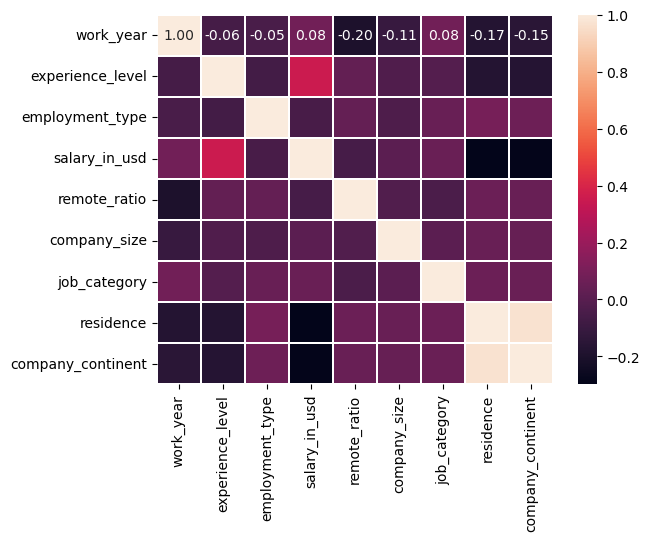

In [83]:
corr_df = df_copy.corr()

sns.heatmap(corr_df, annot= True, fmt= '.2f', linewidths= 0.1)

In [84]:
X = df_copy.drop('salary_in_usd', axis= 1)
y = df_copy['salary_in_usd']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter= 100)
lr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
pred_lr = lr.predict(X_test)

In [ ]:
pred_lr

array([ 70000, 160000, 100000, ..., 130000, 120000, 120000])

In [ ]:
acc = accuracy_score(y_test, pred_lr)
acc * 100

2.3222060957910013

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred = gnb.predict(X_test)

In [ ]:
nb_acc = accuracy_score(y_test, nb_pred)
round(nb_acc *100, 3)


0.895

In [89]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [90]:
linreg.fit(X_train, y_train)

LinearRegression()

In [91]:
linreg_pred = linreg.predict(X_test)

In [92]:
linreg_pred

array([116014.05787081, 170371.89939555, 158540.40766286, ...,
       168616.65119007, 167598.2342883 , 159006.21269229])

In [93]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, linreg_pred)

mae

45189.65762606172